In [2]:
import random

from numpy.polynomial.polynomial import Polynomial, polyfromroots


def make_poly(N):
    p0 = Polynomial([1])

    roots = []
    for i in range(N):
        # random complex in a 10x10 square centered at the origin 
        a = random.random() * 10 - 5
        b = random.random() * 10 - 5    
        roots.append(a + b * 1j)

    p0 = Polynomial(polyfromroots(roots))

    return p0



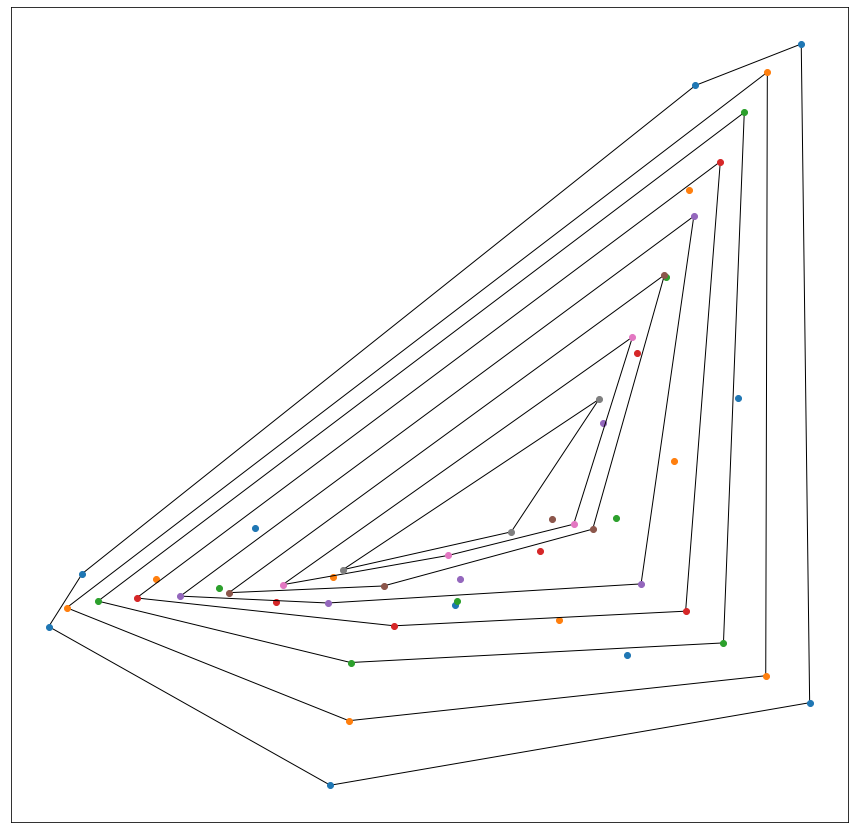

In [4]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax =  plt.subplots(figsize=(15, 15))
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

def plot_pts(pts, color):
    xs = []
    ys = []
    for r in pts:
        xs.append(r[0])
        ys.append(r[1])
    ax.scatter(xs, ys, color=color)

colors = [
    '#1f77b4', 
    '#ff7f0e', 
    '#2ca02c', 
    '#d62728', 
    '#9467bd', 
    '#8c564b', 
    '#e377c2', 
    '#7f7f7f', 
    '#bcbd22', 
    '#17becf'
]

N = 10
p = make_poly(N)
for i in range(N):    
    if len(p) == 3:
        # only 2 roots left
        break
    
    rs = p.roots()
    
    pts = [[r.real, r.imag] for r in rs]
    
    hpts = [pts[idx] for idx in ConvexHull(pts).vertices]
    
    polygon = patches.Polygon(hpts, closed=True, edgecolor='black', facecolor='none')
    ax.add_patch(polygon)

    plot_pts(pts, color=colors[i % len(colors)])

    p = p.deriv()

